저는 충청북도 및 대한민국의 경제지표를 통해 고용률을 예측하고자 합니다. <br>
코로나로 인해 경기가 안좋았으며 취업률 또한 사상 최악을 기록했다는 뉴스를 보았습니다. <br>
이에 취업자수와 연관이 있는 지표를 분석하고 이 지표를 통해 취업자수가 얼마나 되는지 예측을 해서 충북 일자리 정책 제언에 도움이 되었으면 좋겠다는 생각에 주제를 선정하였습니다. <br><br>

이에 2가지 방식으로 예측을 진행했습니다. <br>
첫 번째는 이진 분류 예측입니다. <br>2000년 1분기부터 2021년 1분기까지 청주의 취업자수가그 평균값에 해당하는760(명) 이하이면 0으로 두고, 그 취업자수가 만약 760(명)을초과하면 1로 나누어 예측을 하였습니다. <br>
두 번째는 keras의 회귀예측모델을 사용해 실제 취업자 수를 예측하였습니다.

기본 라이브러리 불러오기 및 데이터셋 준비

In [ ]:
# 먼저 사용할 library를 import 해줍니다. 그리고 dataset을 확인하기 위해 불러옵니다.
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

# Library for creating ML model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

# Library for Analysing the ML model
from sklearn import metrics

df = pd.read_csv('충청북도경제지표.csv',encoding='cp949') 
df.head()

,분기별,전입인구,소비자물가지수,취업자수,청년고용률,예금은행예금액,예금은행대출금액,광공업생산지수,서비스업생산지수,건설투자증감률,국내총투자율,설비투자총지수,민간소비증감률,수출액,경제성장률,고용
0,2000. 1/4,67777,67.406,610.9,38.1,4880.5,4668.2,29.583,42.2,0.8,33.5,61.8,2.1,391,1.9,0
1,2000. 2/4,56930,67.157,684.8,40.2,5333.7,4932.7,33.869,43.7,3.8,33.5,62.9,1.5,419,1.3,0
2,2000. 3/4,49182,67.993,699.5,43.8,5465.4,5019.7,34.021,44.0,-1.1,32.7,65.4,0.6,424,2.8,0
3,2000. 4/4,61266,68.625,669.6,42.1,5871.0,4997.8,33.908,46.0,-2.7,32.7,59.9,0.7,386,-0.3,0
4,2001. 1/4,66625,69.778,614.7,40.7,5743.7,5193.4,30.572,45.3,2.2,31.2,59.2,0.4,357,1.2,0


한글깨짐 방지

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 160772 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


데이터 탐색 및 데이터 전처리

In [ ]:
# null 값이 있나 info()를 통해 살펴봅니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   분기별       85 non-null     object 
 1   전입인구      85 non-null     int64  
 2   소비자물가지수   85 non-null     float64
 3   취업자수      85 non-null     float64
 4   청년고용률     85 non-null     float64
 5   예금은행예금액   85 non-null     float64
 6   예금은행대출금액  85 non-null     float64
 7   광공업생산지수   85 non-null     float64
 8   서비스업생산지수  85 non-null     float64
 9   건설투자증감률   85 non-null     float64
 10  국내총투자율    85 non-null     float64
 11  설비투자총지수   85 non-null     float64
 12  민간소비증감률   85 non-null     float64
 13  수출액       85 non-null     int64  
 14  경제성장률     85 non-null     float64
 15  고용        85 non-null     int64  
dtypes: float64(12), int64(3), object(1)
memory usage: 10.8+ KB


분석에 사용할 속성을 선택

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 51204 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 51077 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 51064 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 44396 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 49548 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 48708 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph

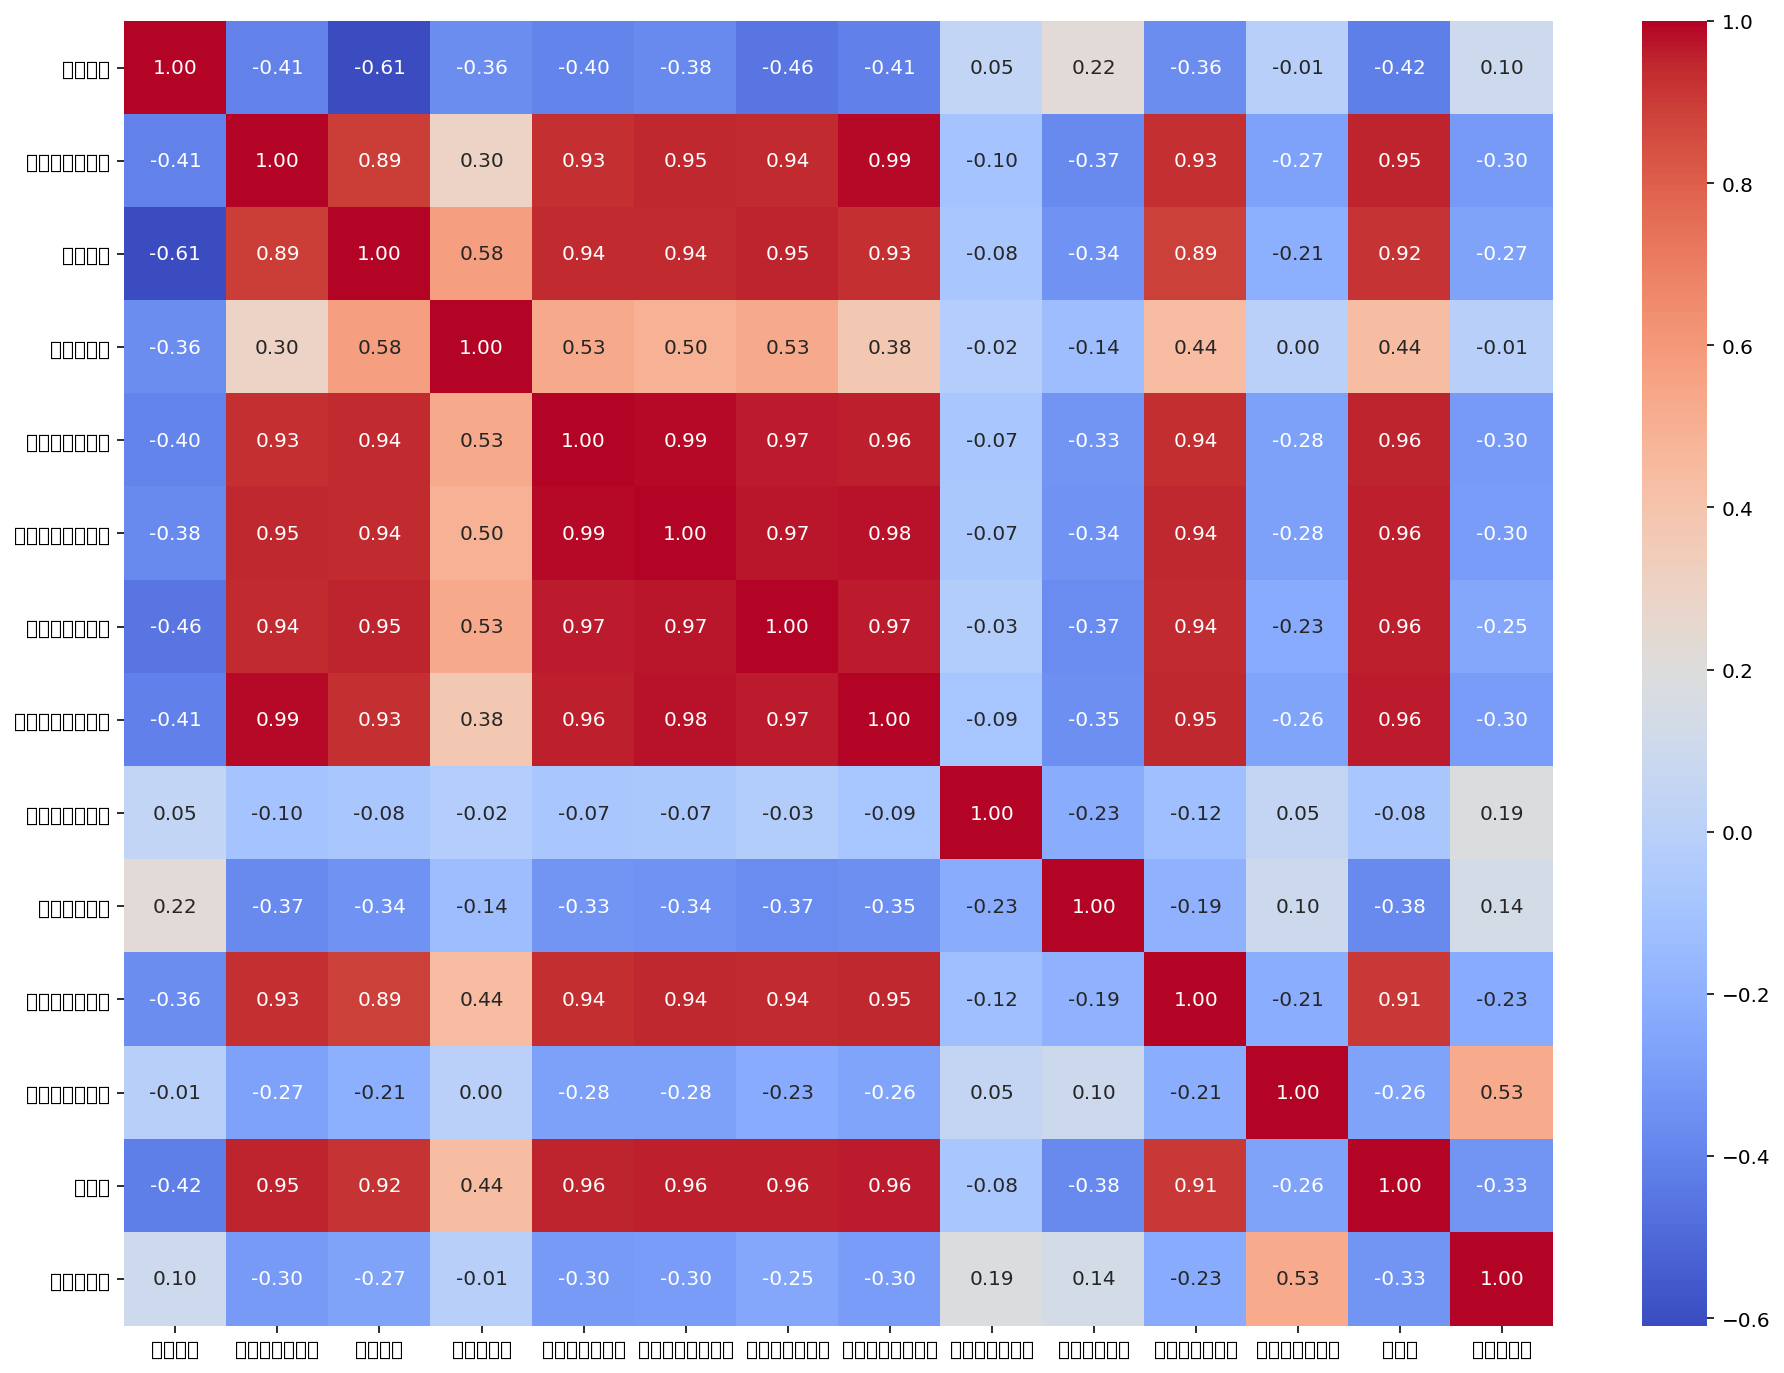

In [ ]:
# null 값이 없는 것을 확인했습니다. 
# 이제 '취업자수'라는 변수와 유의미한 관계가 있는 변수들을 살펴보기 위해 seaborn library의 heatmap을 그려줍니다.

plt.figure(figsize=(16,12))
sns.heatmap(data=df.iloc[:,1:15].corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 44305 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 44277 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 50629 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 49373 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 49328 missing from current font.

/usr/

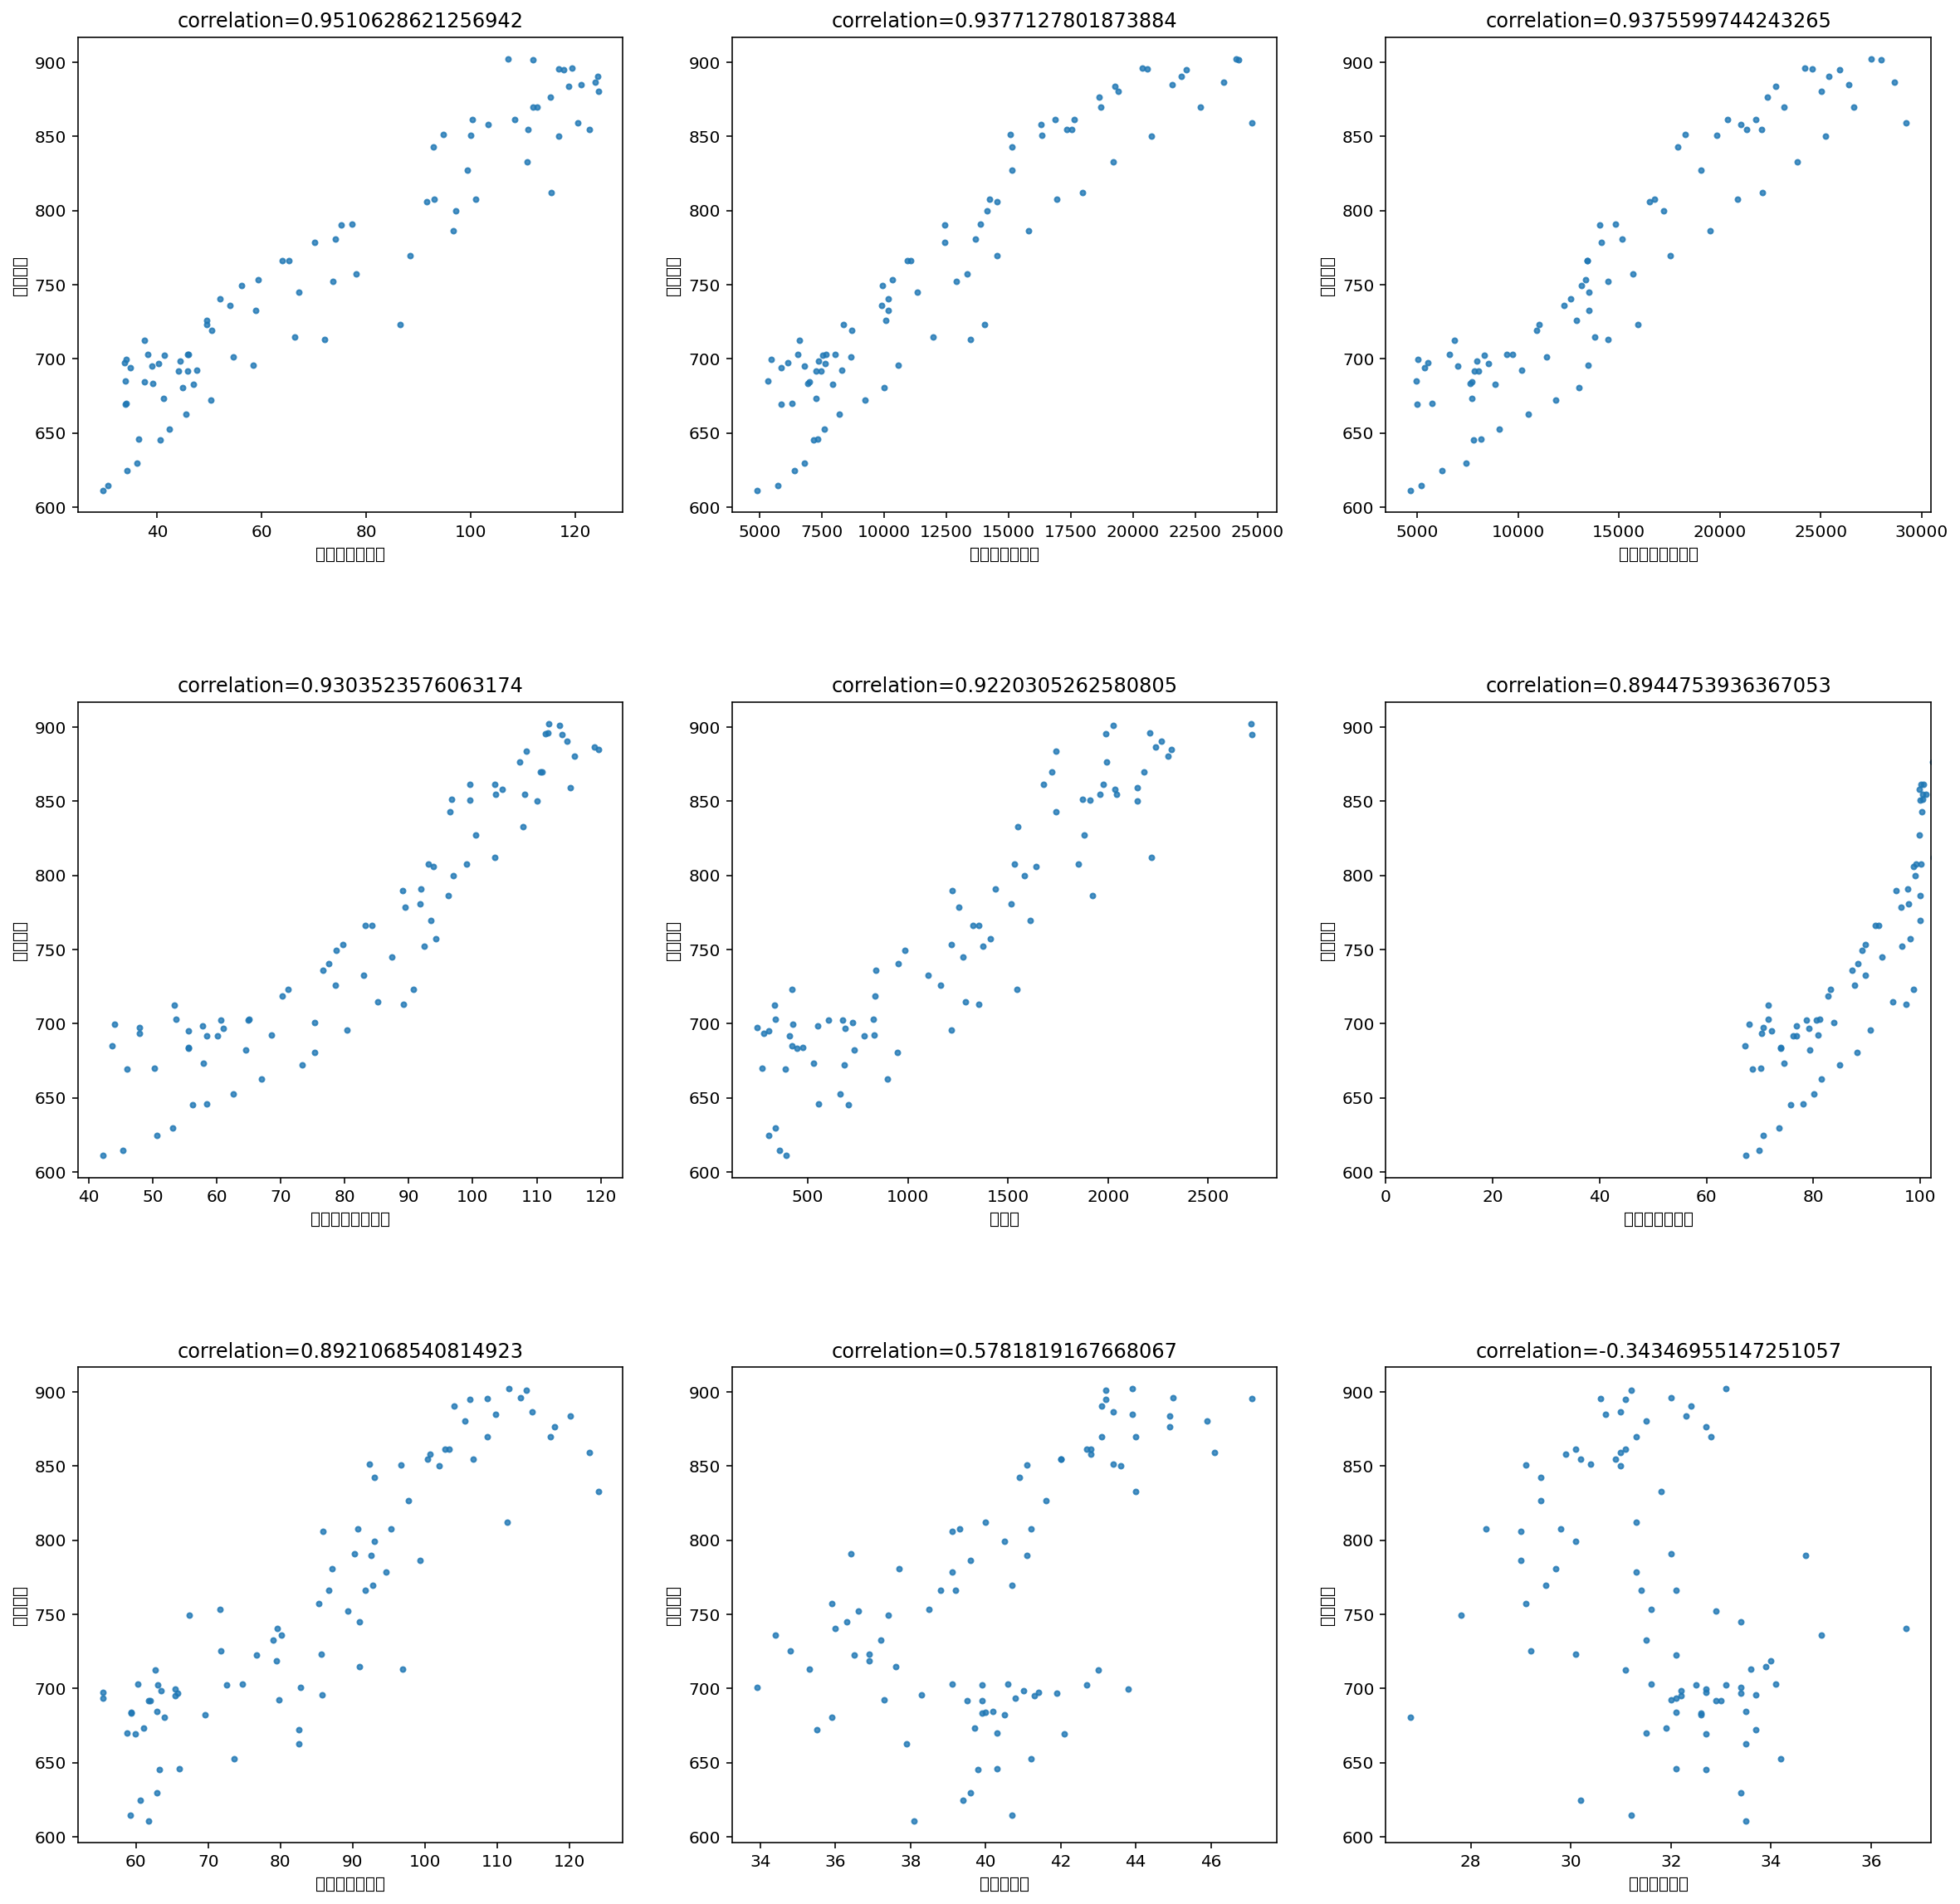

In [ ]:
# 위의 상관관계가 정확한지 판단하기 위해 산포도를 그려 변수들간의 관계를 봅니다.

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,20))
plt.subplots_adjust(hspace=0.4)

corr_to_job = pd.Series()
for col in df.columns.values[2:]:
    if ((col!='취업자수')&(col!='고용')):
      corr_to_job[col] = df['취업자수'].corr(df[col])
abs_corr_to_job = corr_to_job.abs().sort_values(ascending=False)
corr_to_job = corr_to_job.loc[abs_corr_to_job.index]

for i in range(3):
    for j in range(3):
        sns.regplot(x=corr_to_job.index.values[i*3+j], y='취업자수', data=df,
                   ax=axes[i,j], fit_reg=False, marker='.')
        title = 'correlation='+str(corr_to_job[i*3+j])
        axes[i,j].set_title(title)
axes[1,2].set_xlim(0,102)
plt.show()

In [ ]:
# 위의 상관관계의 결과로 전입인구, 건설투자증감률, 국내총투자율을 제외하고 높은 상관관계를 보이는 것을 알 수 있습니다.
# 이들을 속성변수로 사용합니다.

df_feature = df[['취업자수','예금은행대출금액','광공업생산지수','설비투자총지수','수출액','고용']]
df_feature

,취업자수,예금은행대출금액,광공업생산지수,설비투자총지수,수출액,고용
0,610.9,4668.2,29.583,61.8,391,0
1,684.8,4932.7,33.869,62.9,419,0
2,699.5,5019.7,34.021,65.4,424,0
3,669.6,4997.8,33.908,59.9,386,0
4,614.7,5193.4,30.572,59.2,357,0
...,...,...,...,...,...,...
80,869.7,26649.3,111.900,108.7,2179,1
81,902.1,27493.3,107.000,111.6,2715,1
82,901.4,28001.4,111.900,114.0,2026,1
83,886.6,28669.1,123.800,114.9,2236,1


데이터셋 구분 - 훈련용(train data)/검증용(test data)

In [ ]:
X = df_feature[['취업자수','예금은행대출금액','광공업생산지수','설비투자총지수','수출액']]
y = df_feature['고용']

In [ ]:
# 숫자의 수와 차이가 크기 때문에 정규화 작업이 필요합니다. 
from sklearn import preprocessing

X = preprocessing.StandardScaler().fit(X).transform(X)
X

In [ ]:
# 테스트셋과 훈련셋으로 나눠줍니다.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4, random_state=777)

print(X_train.shape)
print(X_test.shape)

(51, 5)
(34, 5)


ML 모델은 이진분류 예측을 위해 LogisticsRegression 과 Ensemble을 사용하였습니다.

머신러닝 모델 구축 -> 1) LogisticRegression

In [ ]:
log_reg = LogisticRegression().fit(X_train,y_train)

In [ ]:
# 정확도 확인
print('Train data Score:', log_reg.score(X_train,y_train))
print('Test data Score:', log_reg.score(X_test,y_test))

Train data Score: 0.9607843137254902
Test data Score: 0.9705882352941176


머신러닝 모델 구축 - 2) Decision Tree

In [ ]:
from sklearn import tree
tree = tree.DecisionTreeClassifier(criterion='entropy',max_depth=5)
tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# 정확도 확인
print('Train data Score:', tree.score(X_train,y_train))
print('Test data Score:', tree.score(X_test,y_test))

Train data Score: 1.0
Test data Score: 1.0


머신러닝 모델 구축 - 3) GradientBoostingClassfier

In [ ]:
boost = GradientBoostingClassifier(max_depth=3,
                                   learning_rate=0.05).fit(X_train,y_train)

In [ ]:
# 정확도 확인
print('Train data Score:', boost.score(X_train,y_train))
print('Test data Score:', boost.score(X_test,y_test))

Train data Score: 1.0
Test data Score: 1.0


머신러닝 모델 구축 -4) RandomForestClassifier

In [ ]:
random = RandomForestClassifier(n_estimators=100,
                                random_state=0).fit(X_train,y_train)

In [ ]:
# 정확도 확인
print('Train data Score:', random.score(X_train,y_train))
print('Test data Score:', random.score(X_test,y_test))

Train data Score: 1.0
Test data Score: 1.0


ROC 커브와 report로 성능평가지표를 만들어 성능을 확인합니다.<br>

In [ ]:
def plot_auc_roc(model):
    probs = model.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)

    # method I: plt
    import matplotlib.pyplot as plt
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

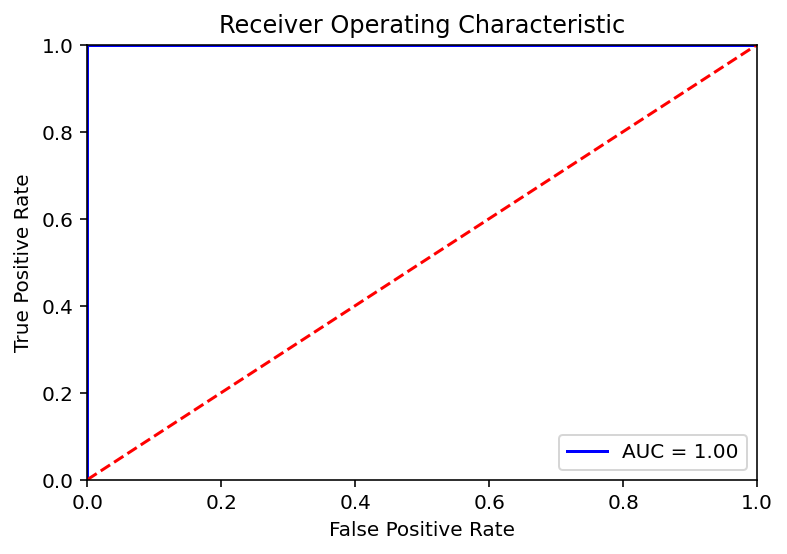

In [ ]:
# Logistic Regression ROC 
plot_auc_roc(log_reg)

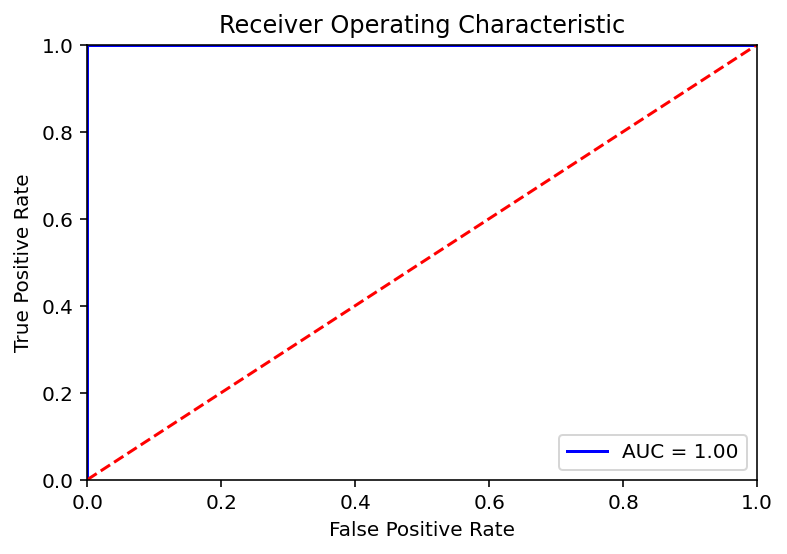

In [ ]:
# Decision Tree ROC 
plot_auc_roc(tree)

In [ ]:
# GradientBoostingClassfier ROC 
plot_auc_roc(boost)

In [ ]:
# RandomForestClassifier ROC 
plot_auc_roc(random)

In [ ]:
# Logistic Regression 평가 지표
lg_y_hat = log_reg.predict(X_test)
lg_report = metrics.classification_report(y_test, lg_y_hat)
print('Logistic Regression 평가 지표')
print(lg_report)

Logistic Regression 평가 지표
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.93      0.97        15

    accuracy                           0.97        34
   macro avg       0.97      0.97      0.97        34
weighted avg       0.97      0.97      0.97        34



In [ ]:
# Decision Tree 평가 지표
tree_y_hat = tree.predict(X_test)
tree_report = metrics.classification_report(y_test, tree_y_hat)
print('Decision tree 평가 지표')
print(tree_report)

Decision tree 평가 지표
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        15

    accuracy                           1.00        34
   macro avg       1.00      1.00      1.00        34
weighted avg       1.00      1.00      1.00        34



1.0이 나오는걸 확인하기 위해 decision tree의 예측과정을 그림으로 확인합니다.

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file='tree.dot',class_names=["고용","비고용"],
                feature_names=df_feature.columns[1:10],impurity=False,filled=True)

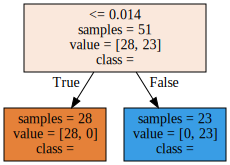

In [ ]:
import graphviz

with open("tree.dot") as f:
  dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [ ]:
# RandomForest 평가 지표
random_y_hat = random.predict(X_test)
random_report = metrics.classification_report(y_test, random_y_hat)
print('RandomForestClassifier 평가 지표')
print(random_report)

RandomForestClassifier 평가 지표
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        15

    accuracy                           1.00        34
   macro avg       1.00      1.00      1.00        34
weighted avg       1.00      1.00      1.00        34



In [ ]:
# GradientBoosting 평가 지표
boost_y_hat = boost.predict(X_test)
boost_report = metrics.classification_report(y_test, boost_y_hat)
print('GradientBoosting 평가 지표')
print(boost_report)

GradientBoosting 평가 지표
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        15

    accuracy                           1.00        34
   macro avg       1.00      1.00      1.00        34
weighted avg       1.00      1.00      1.00        34



In [ ]:
from sklearn import tree
training_accuracy = []
test_accuracy = []
# 1 에서 10 까지 max_depth 를 적용
max_depth_settings = range(1, 11)

for max_depth in max_depth_settings:
    # 모델 생성
    tr = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    tr.fit(X_train, y_train)
    # 훈련 세트 정확도 저장
    training_accuracy.append(tr.score(X_train, y_train))
    # 테스트 세트(일반화) 정확도 저장
    test_accuracy.append(tr.score(X_test, y_test))

plt.figure(dpi = 200)
plt.rc('font', family ='NanumBarunGothic')

plt.plot(max_depth_settings, training_accuracy, label="훈련 정확도")
plt.plot(max_depth_settings, test_accuracy, label="테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("max_depth")
plt.legend()
plt.show()

성능평가 - precision_score, recall_score 각 모델별로 추출한 후 그래프로 시각화

In [ ]:
precision_list = []
recall_list = []

precision_list.append(metrics.precision_score(y_test,lg_y_hat))
recall_list.append(metrics.recall_score(y_test,lg_y_hat))

precision_list.append(metrics.precision_score(y_test,tree_y_hat))
recall_list.append(metrics.recall_score(y_test,tree_y_hat))

precision_list.append(metrics.precision_score(y_test,boost_y_hat))
recall_list.append(metrics.recall_score(y_test,boost_y_hat))

precision_list.append(metrics.precision_score(y_test,random_y_hat))
recall_list.append(metrics.recall_score(y_test,random_y_hat))

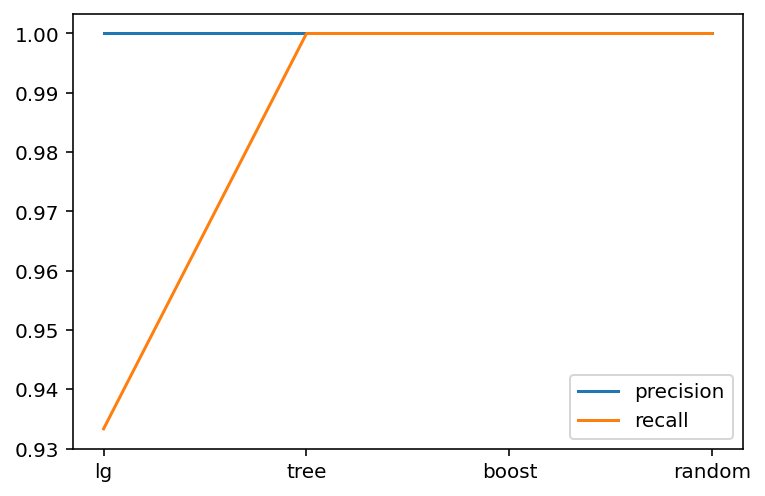

In [ ]:
plt.plot(['lg','tree','boost','random'],precision_list, label='precision')
plt.plot(['lg','tree','boost','random'],recall_list, label='recall')
plt.legend()
plt.show()

2번째 예측모델인 keras의 회귀예측모델을 통해 취업자수를 예측하였습니다.

In [ ]:
# 회귀 예측을 위한 데이터 정제
X_reg = df_feature[['예금은행대출금액','광공업생산지수','설비투자총지수','수출액']]
y_reg = df_feature['취업자수']

In [ ]:
from sklearn.model_selection import train_test_split

X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg,y_reg,test_size=0.4, random_state=777)

print(X_reg_train.shape)
print(X_reg_test.shape)

(51, 4)
(34, 4)


In [ ]:
# 숫자의 수와 차이가 크기 때문에 정규화 작업이 필요합니다. 
from sklearn import preprocessing

X_reg = preprocessing.StandardScaler().fit(X_reg).transform(X_reg)
X_reg

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(4,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1)) #하나의 값을 출력 -> 취업자수

In [ ]:
model.compile(optimizer='adam',loss='mse', metrics=['mae','mse'])

In [ ]:
history = model.fit(X_reg_train, y_reg_train,
                    epochs=2000)

Epoch 1/2000
2/2 [==============================] - 14s 7ms/step - loss: 6728005.6667 - mae: 2456.7500 - mse: 6728005.6667
Epoch 2/2000
2/2 [==============================] - 0s 7ms/step - loss: 3906531.0000 - mae: 1883.9389 - mse: 3906531.0000
Epoch 3/2000
2/2 [==============================] - 0s 5ms/step - loss: 1829904.0833 - mae: 1307.1039 - mse: 1829904.0833
Epoch 4/2000
2/2 [==============================] - 0s 6ms/step - loss: 650049.0417 - mae: 791.6023 - mse: 650049.0417
Epoch 5/2000
2/2 [==============================] - 0s 6ms/step - loss: 121687.2448 - mae: 325.8601 - mse: 121687.2448
Epoch 6/2000
2/2 [==============================] - 0s 6ms/step - loss: 100128.0443 - mae: 239.2125 - mse: 100128.0443
Epoch 7/2000
2/2 [==============================] - 0s 9ms/step - loss: 320293.0729 - mae: 447.5645 - mse: 320293.0729
Epoch 8/2000
2/2 [==============================] - 0s 9ms/step - loss: 564879.0625 - mae: 601.0966 - mse: 564879.0625
Epoch 9/2000
2/2 [====================

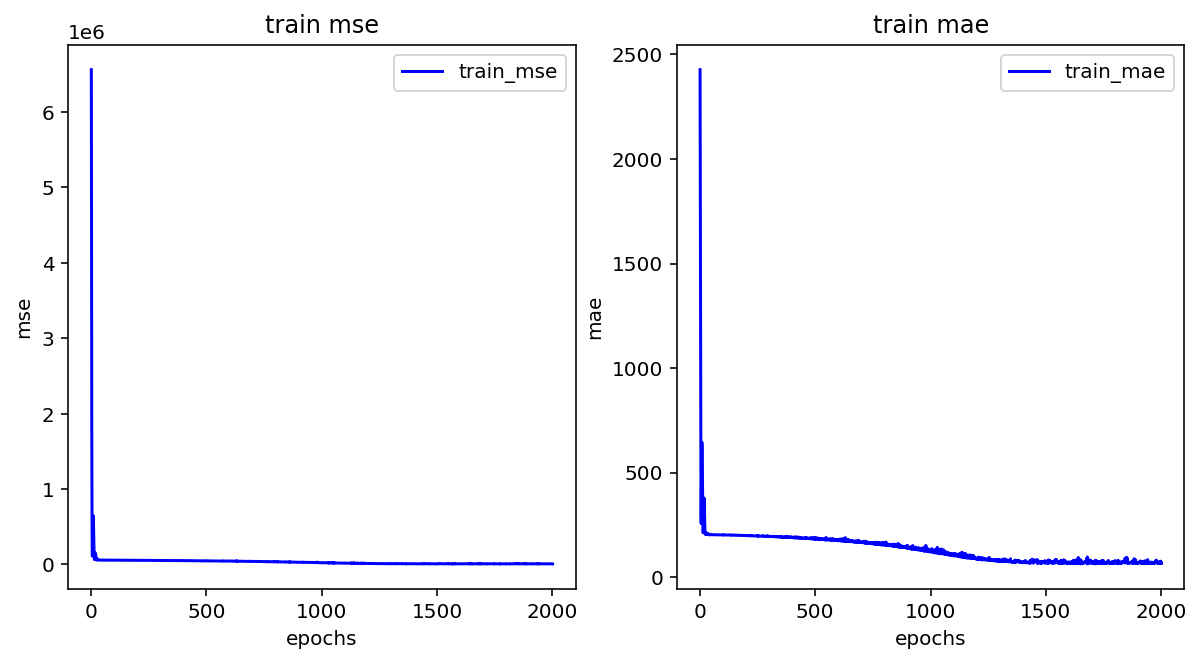

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
mse = his_dict['mse']

epochs = range(1, len(mse) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, mse, color = 'blue', label = 'train_mse')
ax1.set_title('train mse')
ax1.set_xlabel('epochs')
ax1.set_ylabel('mse')
ax1.legend()

mae = his_dict['mae']


# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, color = 'blue', label = 'train_mae')
ax2.set_title('train mae')
ax2.set_xlabel('epochs')
ax2.set_ylabel('mae')
ax2.legend()

plt.show()

In [ ]:
model.evaluate(X_reg_test, y_reg_test)

2/2 [==============================] - 1s 4ms/step - loss: 4587.5869 - mae: 52.3531 - mse: 4587.5869


[4587.5869140625, 52.353084564208984, 4587.5869140625]

In [ ]:
# '예금은행대출금액','광공업생산지수','설비투자총지수','수출액'
job_pre = np.array([22112.6,115.3, 111.4, 2217]).reshape(1,4) 

실제와 오차가 크게 났음을 볼 수 있습니다.

In [ ]:
model.predict(job_pre)

array([[966.06885]], dtype=float32)